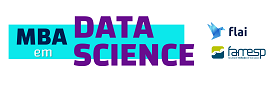

# **Cédulas Falsas Apreendidas no Brasil**

## **Entendendo o contexto**

### **Cédulas Falsas**

Apesar da tecnologia está muito presente em nosso dia-a-dia, e nossas transações financeiras acontecer também no meio digital através de Transferências Eletrônicas, TED, DOC, PIX, Pagamentos Eletrônicos de Boletos, DDA, Pagamentos com Cartão de Creditos, entre outras, ainda utilizamos moedas e cédulas de dinheiro.

As cédulas são passíveis de falsificação, e o Banco Central do Brasil atua para inibir este tipo de Crime. Diariamente, quantidades significativas de cédulas chegam para análise no BCB e entre dessas são encontradas muitas falsas.

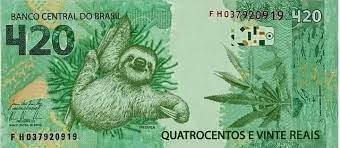

### **O Objetivo da Aula**

Compreender sobre falsificação de cédulas apreendidas no Brasil através de visualização de dados.

### **O dataset**

Estes conjuntos de dados, oriundos do Banco Central do Brasil (BCB), foi estruturado de forma que cada instância é um tipo de contratação cédula, em determinado ano e Unidade da Federação, e os atributos são:
ano;nome_uf;codigo_uf;sigla_uf;nome_regiao;codigo_regiao;familia;denominacao;quantidade


- **ano:** Ano de apreensão da cédula falsa;
- **nome_uf:** Nome da Unidade da Federação; 
- **codigo_uf:** Código da Unidade da Federação; 
- **sigla_uf:** Sigla da Unidade da Federação; 
- **nome_regiao:** Nome da Grande Região; 
- **codigo_regiao:** Código da Grande Região; 
- **familia:** Agrupamento da espécie (cédulas, moedas e peças comuns e comemorativas) e característica da espécie;
- **denominacao:** Valor do numerário;
- **quantidade:** Montante apreendido;

Os conjunto de dados está disponível em um repositório no GitHub que pode ser acessado através do link:

- https://raw.githubusercontent.com/jonates/opendata/master/bcb_cedulas_falsas/cedulas_falsas.csv;


## **Hands-on**

1. **Carregar dados**;
2. **Entender a estrutura dos dados**;
3. **Transformar dados**;
4. **Elaboração do Gráfico**.

### **Carregando o conjunto de dados**

In [ ]:
# Importando o Pandas
import pandas as pd

In [ ]:
# Importando o conjunto de dados de Cédulas Falsas apreendidas pelo Banco Central
cf = pd.read_csv(
    filepath_or_buffer = 'https://raw.githubusercontent.com/jonates/opendata/master/bcb_cedulas_falsas/cedulas_falsas.csv', 
    sep=';'
)

In [ ]:
# Espiando o conjunto de dados
cf.head(5)

,ano,nome_uf,codigo_uf,sigla_uf,nome_regiao,codigo_regiao,familia,denominacao,quantidade
0,1995,Paraná,41,PR,Sul,4,Cédulas - 1a. família,50,237
1,1995,Rio de Janeiro,33,RJ,Sudeste,3,Cédulas - 1a. família,50,3
2,1995,Rio de Janeiro,33,RJ,Sudeste,3,Cédulas - 1a. família,100,1
3,1995,São Paulo,35,SP,Sudeste,3,Cédulas - 1a. família,100,1
4,1996,Distrito Federal,53,DF,Centro-Oeste,5,Cédulas - 1a. família,50,1


### **Espiando a estrutura dos dados**

In [ ]:
# Informacoes gerais do conjunto de dados
cf.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5651 entries, 0 to 5650
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ano            5651 non-null   int64 
 1   nome_uf        5651 non-null   object
 2   codigo_uf      5651 non-null   object
 3   sigla_uf       5651 non-null   object
 4   nome_regiao    5651 non-null   object
 5   codigo_regiao  5651 non-null   object
 6   familia        5651 non-null   object
 7   denominacao    5651 non-null   int64 
 8   quantidade     5651 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 397.5+ KB


In [ ]:
# Verificando valores missing
cf.isnull().sum()

ano              0
nome_uf          0
codigo_uf        0
sigla_uf         0
nome_regiao      0
codigo_regiao    0
familia          0
denominacao      0
quantidade       0
dtype: int64

---

### **Análise das Cédulas Falsas apreendidas no Brasil**

#### **Evolução das apreensões de cédulas falsas**

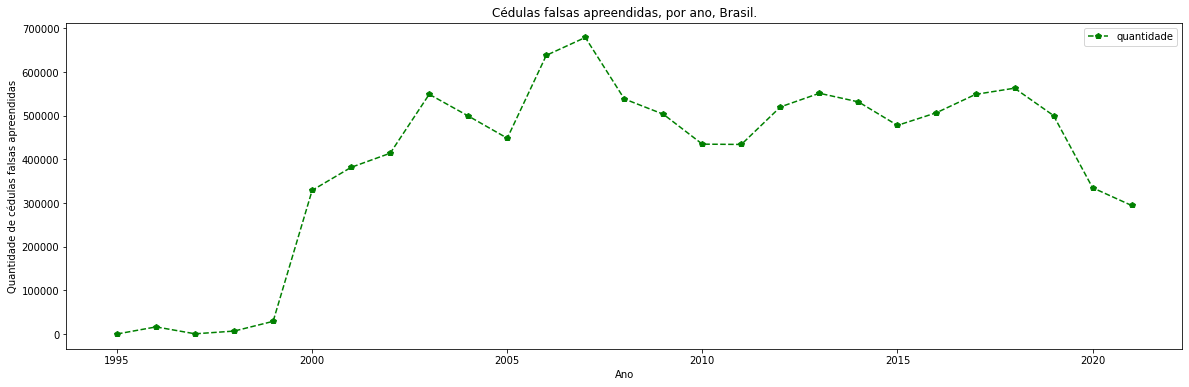

In [ ]:
cf.groupby('ano', as_index = True)\
  .agg({"quantidade": "sum"})\
  .reset_index()\
  .plot.line(
    x='ano',
    y = 'quantidade', 
    color = 'green',
    marker='p',
    linestyle = '--',
    figsize=(20, 6),
    title = 'Cédulas falsas apreendidas, por ano, Brasil.',
    ylabel='Quantidade de cédulas falsas apreendidas',
    xlabel='Ano'
);

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

#### **Denominação das cédulas falsas apreendidas em 2021**

In [ ]:
# Denominação das cédulas falsas apreendidas em 2021
denominacao_cf_21 = cf.query('ano==2021')\
  .groupby('denominacao', as_index = True)\
  .agg({"quantidade": "sum"})\
  .reset_index()

# Calculando porcentagem
denominacao_cf_21['pct'] = (denominacao_cf_21['quantidade'])\
                        .div(denominacao_cf_21['quantidade'] .sum()) \
                        .mul(100)\
                        .round(2)

# Espiando a tabela
denominacao_cf_21 

,denominacao,quantidade,pct
0,1,8,0.00
1,2,1417,0.48
2,5,4986,1.69
3,10,12324,4.19
4,20,38635,13.12
5,50,60685,20.61
6,100,120921,41.07
7,200,55416,18.82


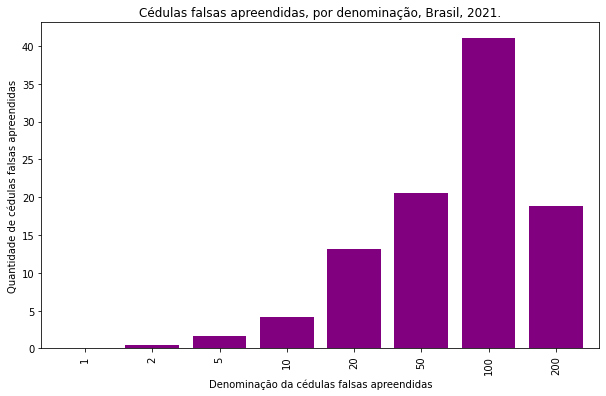

In [ ]:
denominacao_cf_21.plot.bar(
    x='denominacao',
    y = 'pct', 
    color = 'purple',
    figsize=(10, 6),
    title = 'Cédulas falsas apreendidas, por denominação, Brasil, 2021.',
    ylabel='Quantidade de cédulas falsas apreendidas',
    xlabel='Denominação da cédulas falsas apreendidas',
    legend = False,
    width = 0.8
);

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
- https://pandas.pydata.org/docs/user_guide/visualization.html

#### **Cédulas Falsas por famílias apreendidas em 2021**

In [ ]:
# Família das cédulas falsas apreendidas em 2021
familias_cf_21 = cf.query('ano==2021')\
  .groupby('familia', as_index = True)\
  .agg({"quantidade": "sum"})\
  .reset_index()

# Calculando porcentagem
familias_cf_21['pct'] = (familias_cf_21['quantidade'])\
                        .div(familias_cf_21['quantidade'] .sum()) \
                        .mul(100)\
                        .round(2)

# Espiando a tabela
familias_cf_21.head()  

,familia,quantidade,pct
0,Cédulas - 1a. família,34668,11.78
1,Cédulas - 2a. família,259718,88.22
2,Cédulas - em polímero,6,0.00


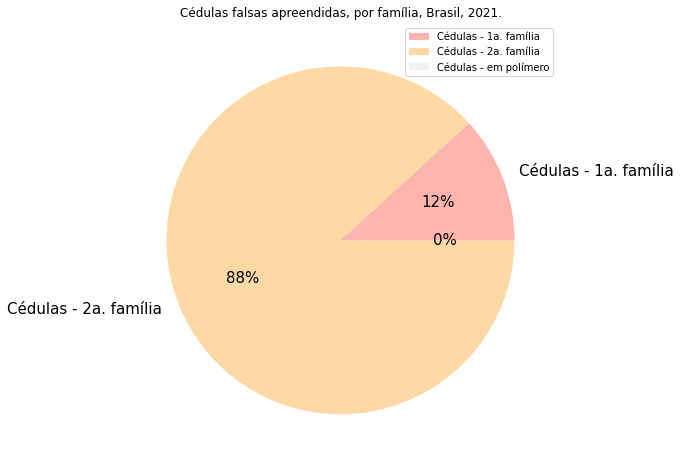

In [ ]:
# Elaborando gráfico de pizza com a biblioteca Pandas
familias_cf_21.plot(
    kind='pie',
    y = 'pct', 
    labels = familias_cf_21['familia'],
    colormap = 'Pastel1',
    autopct='%.0f%%',
    fontsize=15,
    figsize=(8, 8),
    title = 'Cédulas falsas apreendidas, por família, Brasil, 2021.',
    ylabel=''
);

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
- https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html

---

#### **Denominação das cédulas falsas apreendidas por UF em 2021**

In [ ]:
# Filtrando somente as apreensões em 2021
cf21 = cf.query('ano==2021')\

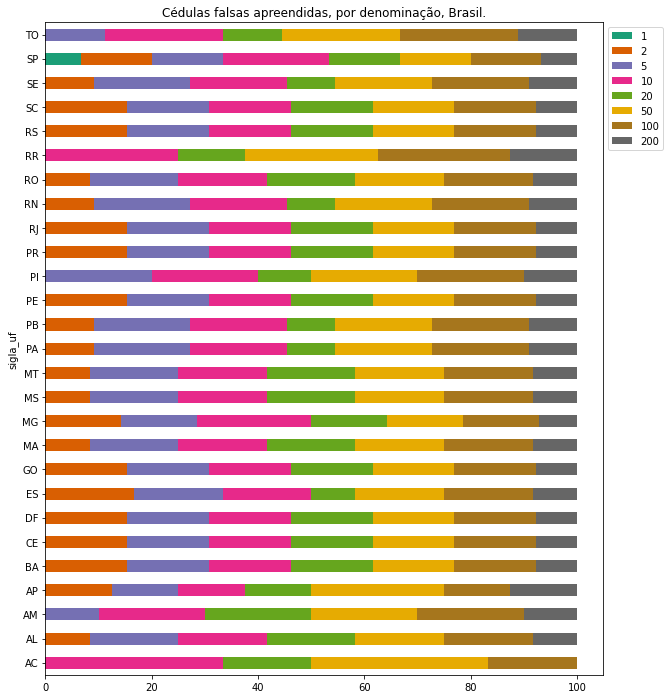

In [ ]:
# Denominação das cédulas falsas apreendidas por UF em 2021
pd.crosstab(index = cf21['sigla_uf'], columns = cf21['denominacao'],normalize = 'index')\
  .mul(100)\
  .plot.barh(
      stacked=True, 
      figsize = (10, 12), 
      colormap = 'Dark2',
      title = 'Cédulas falsas apreendidas, por denominação, Brasil.')\
  .legend(bbox_to_anchor=(1.0, 1.0));

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html

---

### **Faça Você mesmo**

Baseado nos conhecimentos desta aula, construa gráficos com a biblioteca Pandas, para visualizar o comportamento dos times nas edições da série A do Brasileirão. O conjunto de dados está disponível para download no link:

- https://raw.githubusercontent.com/jonates/opendata/master/brasileirao_serie_a/brasileirao_serie_a.csv;